In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
patient=pd.read_csv("data/train.csv",index_col='id')

In [4]:
patient['INTUBED'].value_counts()

97    806080
2     151122
1      31977
99      6967
Name: INTUBED, dtype: int64

In [5]:
patient.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
id,,,,,,,,,,,,,,,,,,,,,
778,2,3,2,1,0,97,1,61,97,2,...,2,2,2,2,2,2,2,2,4,97
392559,1,8,1,2,1,2,1,62,2,2,...,2,2,2,2,2,2,2,2,7,2
917461,2,12,2,1,1,97,2,26,97,2,...,2,2,2,2,2,1,2,2,7,97
167344,1,4,1,1,1,97,99,63,2,2,...,2,2,1,2,2,2,2,2,6,97
44488,1,4,2,2,0,1,2,69,97,2,...,2,2,2,2,2,2,2,2,3,2


In [6]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996146 entries, 778 to 497631
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   USMER                 996146 non-null  int64
 1   MEDICAL_UNIT          996146 non-null  int64
 2   SEX                   996146 non-null  int64
 3   PATIENT_TYPE          996146 non-null  int64
 4   DATE_DIED             996146 non-null  int64
 5   INTUBED               996146 non-null  int64
 6   PNEUMONIA             996146 non-null  int64
 7   AGE                   996146 non-null  int64
 8   PREGNANT              996146 non-null  int64
 9   DIABETES              996146 non-null  int64
 10  COPD                  996146 non-null  int64
 11  ASTHMA                996146 non-null  int64
 12  INMSUPR               996146 non-null  int64
 13  HIPERTENSION          996146 non-null  int64
 14  OTHER_DISEASE         996146 non-null  int64
 15  CARDIOVASCULAR        996146 non

In [7]:
patient.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,996146.000000,996146.000000,996146.000000,996146.000000,996146.000000,996146.000000,996146.000000,996146.000000,996146.000000,996146.000000,...,996146.000000,996146.000000,996146.000000,996146.000000,996146.000000,996146.000000,996146.00000,996146.000000,996146.000000,996146.000000
mean,1.632064,8.979572,1.499251,1.190801,0.926537,79.520185,3.348309,41.794946,49.764457,2.185461,...,2.243087,2.298634,2.129387,2.436115,2.262464,2.125814,2.25695,2.214454,5.306489,79.551342
std,0.482244,3.723758,0.500000,0.392933,0.260895,36.871105,11.918720,16.908435,47.510753,5.415652,...,5.118545,5.467218,5.238314,6.653744,5.200870,5.180424,5.13293,5.324838,1.881017,36.825192
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,1.000000,97.000000,2.000000,30.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,97.000000
50%,2.000000,12.000000,1.000000,1.000000,1.000000,97.000000,2.000000,40.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,6.000000,97.000000
75%,2.000000,12.000000,2.000000,1.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,7.000000,97.000000
max,2.000000,13.000000,2.000000,2.000000,1.000000,99.000000,99.000000,121.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,7.000000,99.000000


In [8]:
patient.replace(to_replace=[97,98,99],value=-1,inplace=True)

In [9]:
def change(x):
    if x!=1:
        return 0
    else:
        return 1
def classification_change(x):
    if x>=4:
        return 4;
    else:
        return x;

In [10]:
bin_attribs =  [ 'PNEUMONIA', 'DIABETES', 'COPD',        \
                'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC',     \
                'OBESITY', 'TOBACCO', 'INTUBED']
patient[bin_attribs] = patient[bin_attribs].applymap(change)
patient['CLASIFFICATION_FINAL'] = patient['CLASIFFICATION_FINAL'].apply(classification_change)

In [11]:
patient['DISEASE'] =  patient['DIABETES'].apply(lambda x: 1 if x ==1 else 0) +           \
                    patient['COPD'].apply(lambda x: 1 if x ==1 else 0) +               \
                    patient['ASTHMA'].apply(lambda x: 1 if x ==1 else 0) +             \
                    patient['INMSUPR'].apply(lambda x: 1 if x ==1 else 0) +            \
                    patient['HIPERTENSION'].apply(lambda x: 1 if x ==1 else 0) +       \
                    patient['OTHER_DISEASE'].apply(lambda x: 1 if x ==1 else 0) +      \
                    patient['CARDIOVASCULAR'] .apply(lambda x: 1 if x ==1 else 0) +    \
                    patient['OBESITY'].apply(lambda x: 1 if x ==1 else 0) +            \
                    patient['RENAL_CHRONIC'].apply(lambda x: 1 if x ==1 else 0) +      \
                    patient['TOBACCO'].apply(lambda x: 1 if x ==1 else 0)

In [12]:
corr_matrix = patient.corr()
corr_matrix[['DATE_DIED']].applymap(abs).style.background_gradient(cmap="magma")

,DATE_DIED
USMER,0.112698
MEDICAL_UNIT,0.149542
SEX,0.081310
PATIENT_TYPE,0.516095
DATE_DIED,1.000000
INTUBED,0.495259
PNEUMONIA,0.469393
AGE,0.319741
PREGNANT,0.078820
DIABETES,0.215950


<AxesSubplot:>

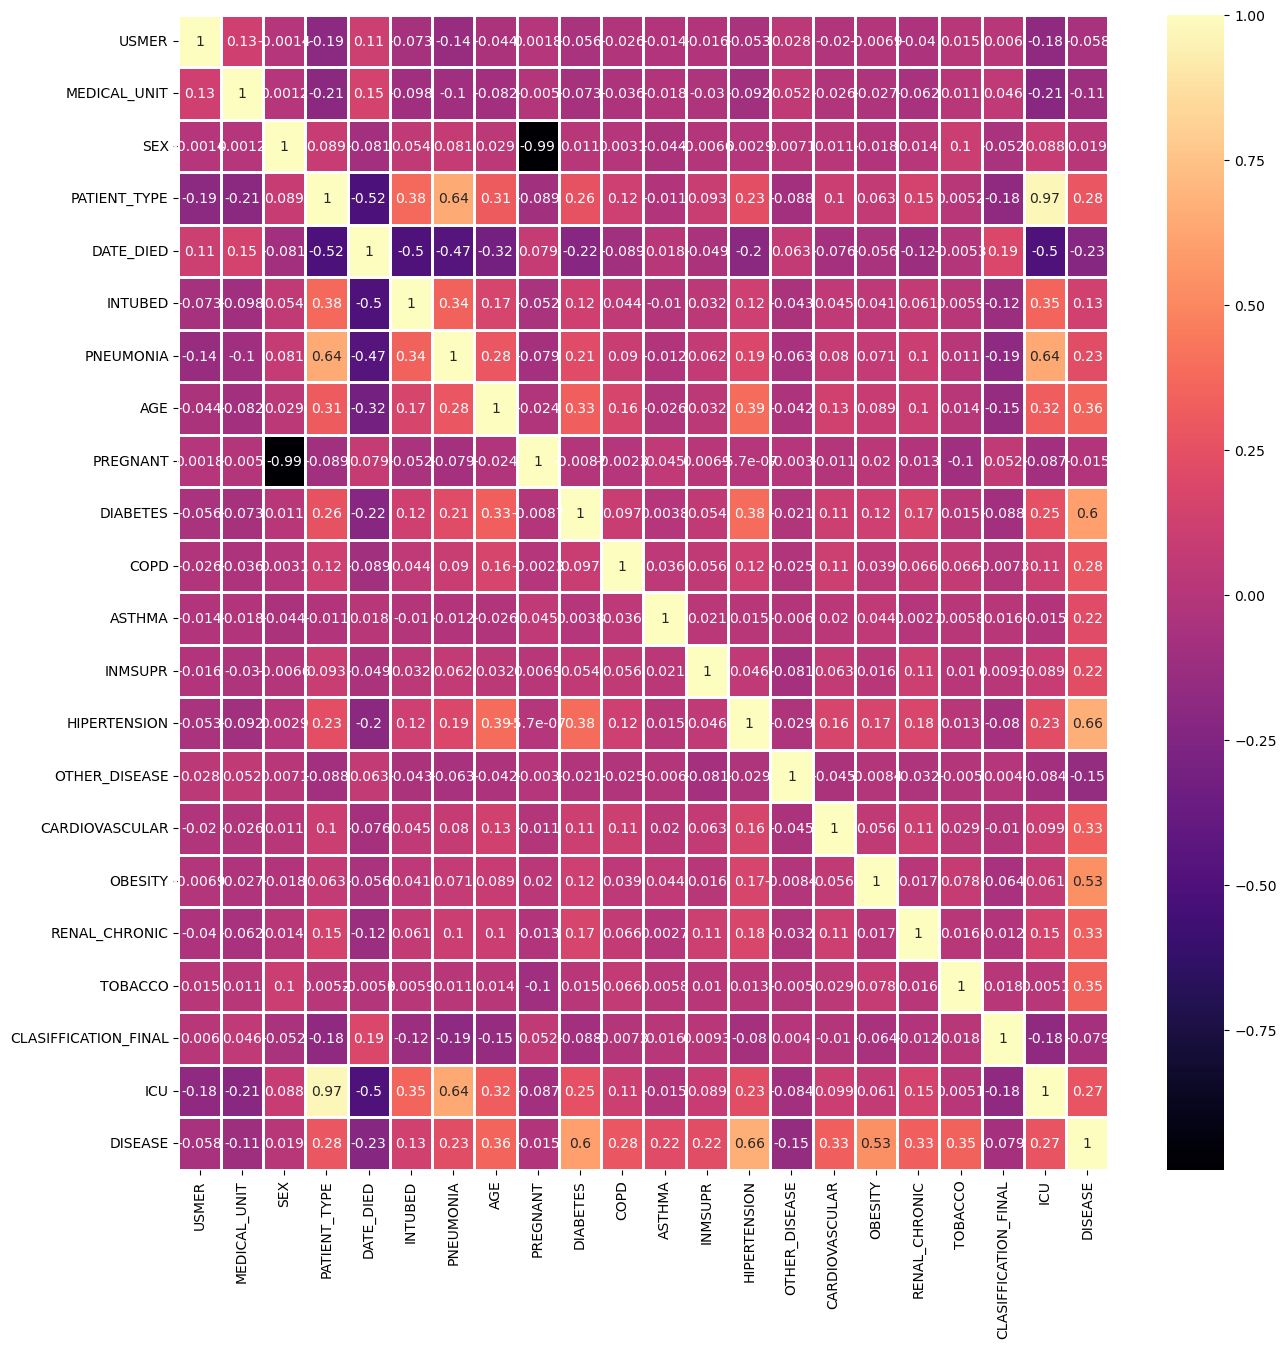

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(patient.corr(),cmap="magma",linewidths=1,linecolor='white',annot=True)

array([[<AxesSubplot:title={'center':'USMER'}>,
        <AxesSubplot:title={'center':'MEDICAL_UNIT'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'PATIENT_TYPE'}>,
        <AxesSubplot:title={'center':'DATE_DIED'}>],
       [<AxesSubplot:title={'center':'INTUBED'}>,
        <AxesSubplot:title={'center':'PNEUMONIA'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'PREGNANT'}>,
        <AxesSubplot:title={'center':'DIABETES'}>],
       [<AxesSubplot:title={'center':'COPD'}>,
        <AxesSubplot:title={'center':'ASTHMA'}>,
        <AxesSubplot:title={'center':'INMSUPR'}>,
        <AxesSubplot:title={'center':'HIPERTENSION'}>,
        <AxesSubplot:title={'center':'OTHER_DISEASE'}>],
       [<AxesSubplot:title={'center':'CARDIOVASCULAR'}>,
        <AxesSubplot:title={'center':'OBESITY'}>,
        <AxesSubplot:title={'center':'RENAL_CHRONIC'}>,
        <AxesSubplot:title={'center':'TOBACCO'}>,
        <AxesSubplot:

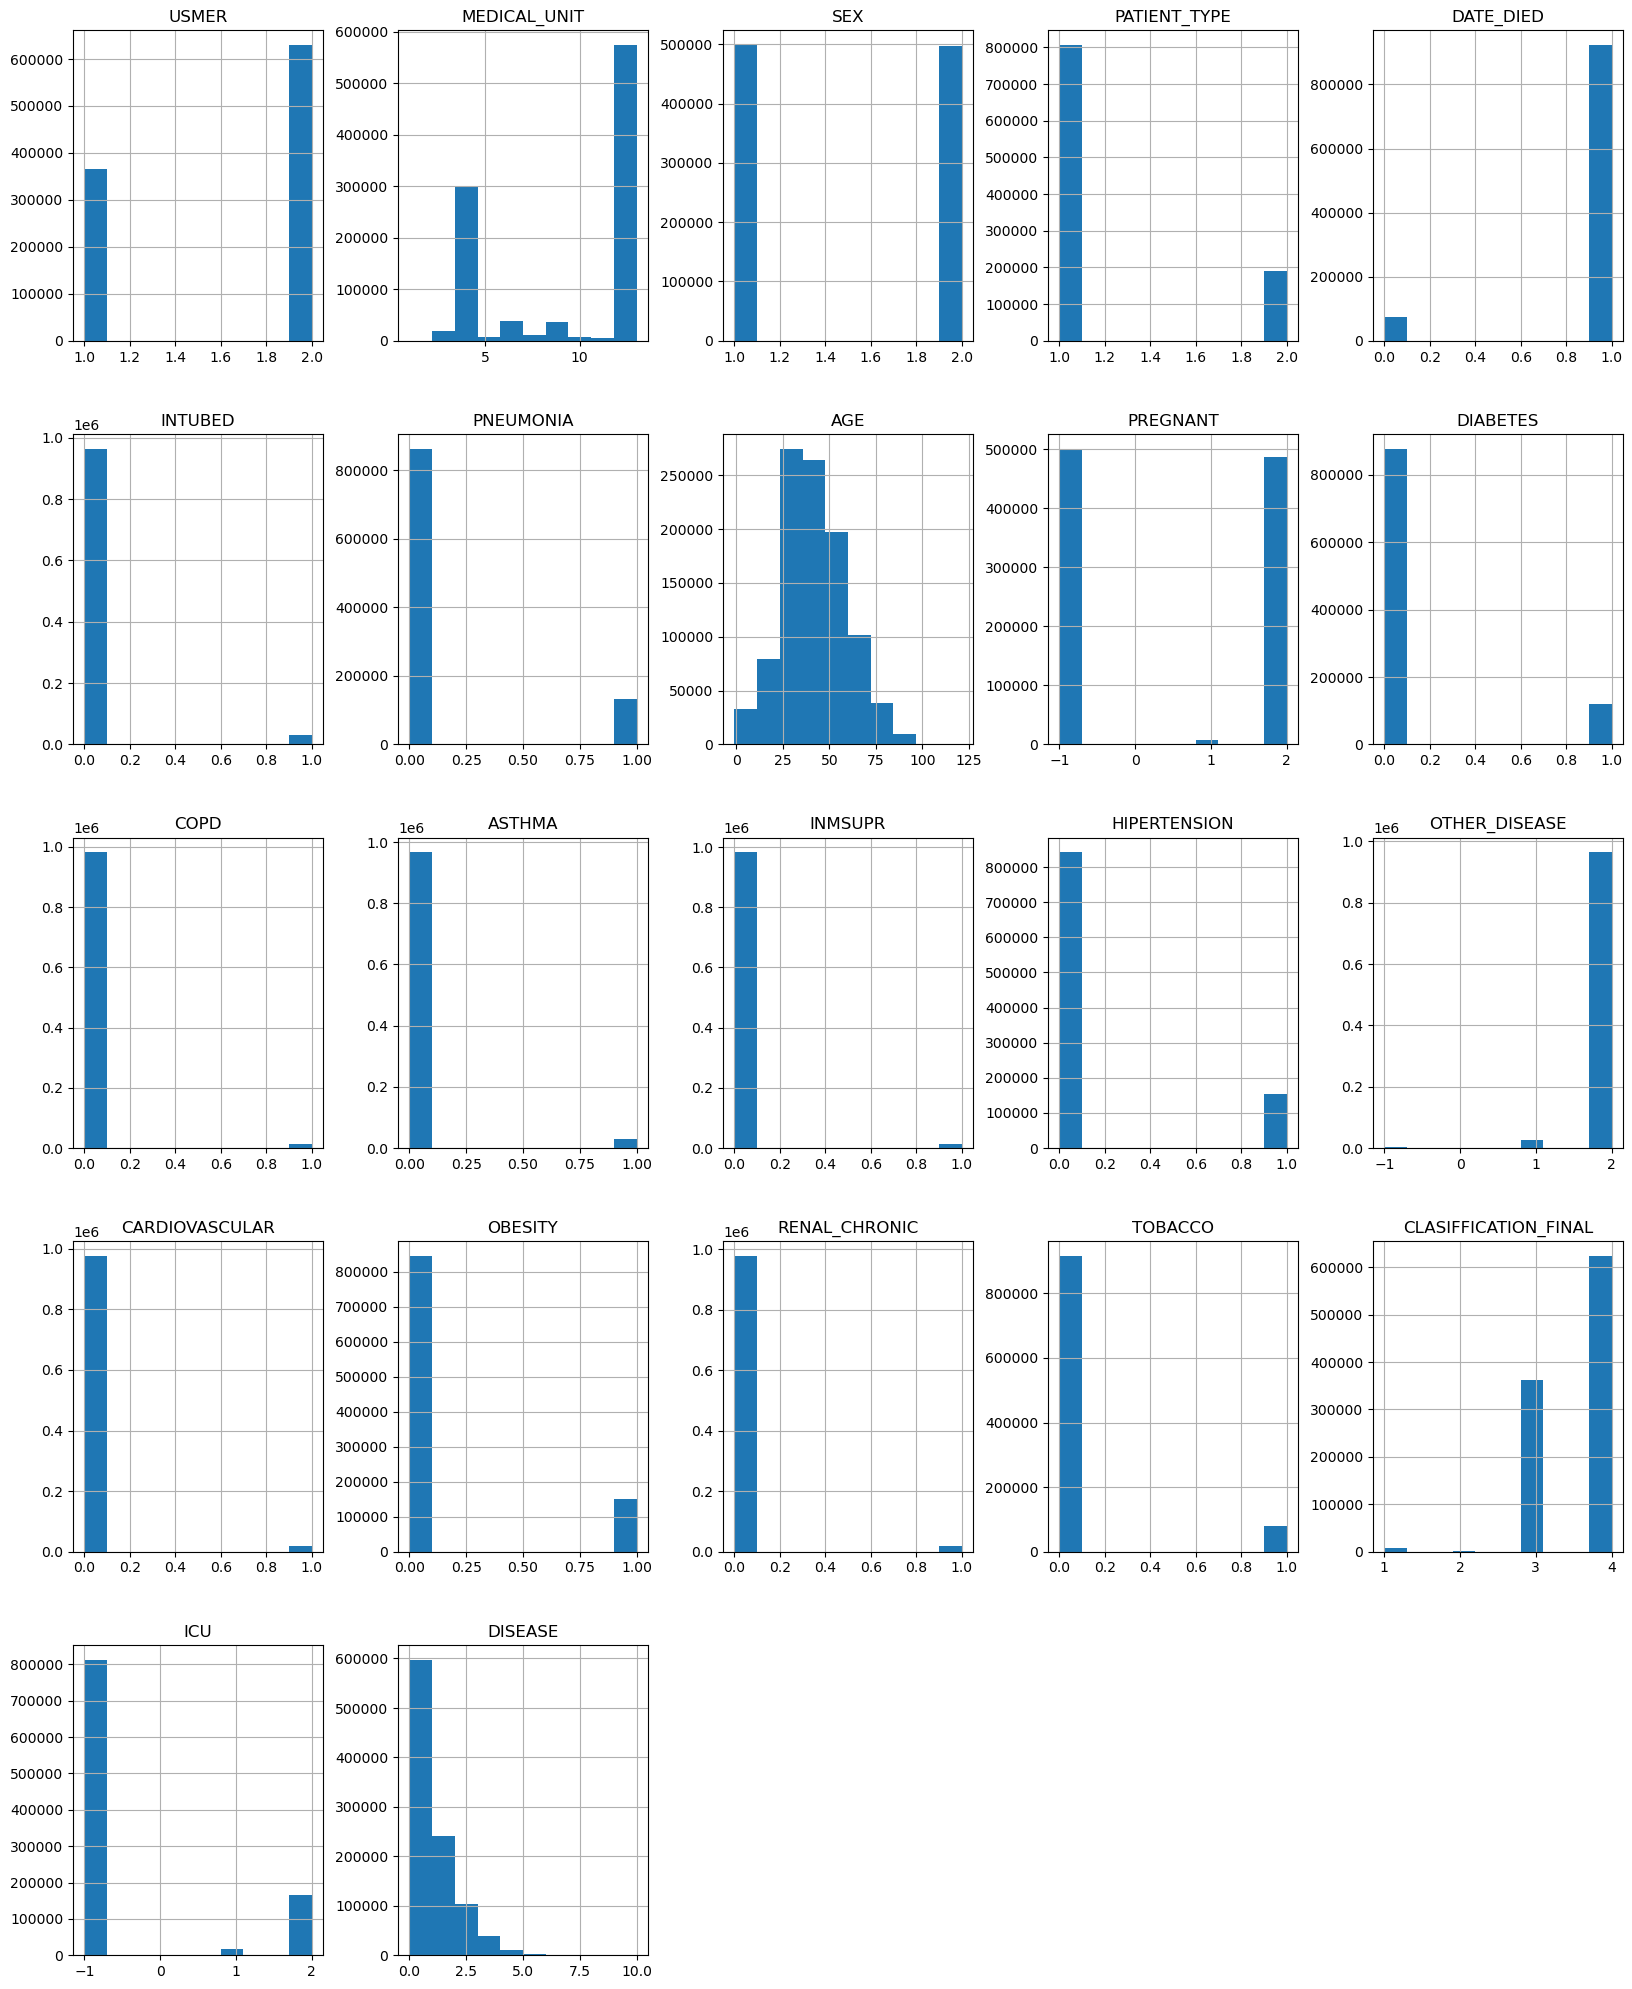

In [14]:
patient.hist(figsize=[20,25])

In [15]:
from sklearn.model_selection import train_test_split
# pip install scikit_learn



In [16]:
X=patient.drop(['DATE_DIED','SEX','PREGNANT','COPD','ASTHMA','INMSUPR','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','TOBACCO','ICU','INTUBED'],axis=1)
Y=patient['DATE_DIED']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.53      0.48      0.50     14570
           1       0.96      0.97      0.96    184660

    accuracy                           0.93    199230
   macro avg       0.74      0.72      0.73    199230
weighted avg       0.93      0.93      0.93    199230

[[  7038   7532]
 [  6328 178332]]


In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=15)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions4))
print(confusion_matrix(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.55      0.45      0.50     14570
           1       0.96      0.97      0.96    184660

    accuracy                           0.93    199230
   macro avg       0.76      0.71      0.73    199230
weighted avg       0.93      0.93      0.93    199230

[[  6553   8017]
 [  5284 179376]]


In [20]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

In [ ]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['cart'] = DecisionTreeClassifier()
    models['rforest']=RandomForestClassifier(n_estimators=15)
    return models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


>lr 0.936 (0.001)
>cart 0.925 (0.002)
>rforest 0.930 (0.001)


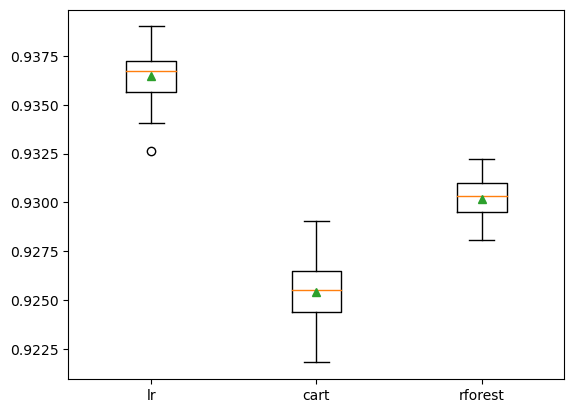

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_test, y_test)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
estimators=[
    ('rforest',RandomForestClassifier(n_estimators=15)),
    ('cart',DecisionTreeClassifier()),
    ('lr',LogisticRegression()),
            ]
c_stacking=StackingClassifier(estimators=estimators)
c_stacking.fit(X_train,y_train)
print(classification_report(y_test,c_stacking.predict(X_test)))

c:\Users\Soumojit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Soumojit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

              precision    recall  f1-score   support

           0       0.61      0.41      0.49     14551
           1       0.95      0.98      0.97    184679

    accuracy                           0.94    199230
   macro avg       0.78      0.69      0.73    199230
weighted avg       0.93      0.94      0.93    199230

